In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [2]:
sns.__version__

'0.11.0'

### Problem
Customer churn adalah problematika perusahaan telekomunikasi, karena akan lebih sulit dan memakan biaya yang lebih untuk mendapatkan customer baru dibanding mempertahankan customer yang sudah ada, agar tidak berhenti berlayanan. 
### Goals
Mendapatkan Analisis terhadap
faktor - faktor atau karakteristik customer yang berhenti berlangganan atau unsubscribe dari layanan perusahaan.

Definisi dari kolom:
- **Churn** -> Customers yang unsubscribe bulan lalu (Yes, No) Yes == Unsubscribe
- customerID : Customer ID
- gender : Jenis kelamin Pria atau Wanita
- SeniorCitizen : apakah customer orang tua atau bukan (1, 0)
- Partner : customer punya pasangan atau tidak (Yes, No)
- Dependents : customer punya Tanggungan atau tidak (Yes, No)
- tenure : Jumlah bulan customer sudah berlangganan
- PhoneService : customer ambil paket line telefon atau tidak (Yes, No)
- MultipleLines : customer ambil paket MultipleLines atau tidak (Yes, No, No phone service)
- InternetService : Customer internet service provider (DSL, Fiber optic, No)
- OnlineSecurity : customer ambil paket Online Security atau tidak (Yes, No, No internet service)
- OnlineBackup : customer ambil paket online backup atau tidak (Yes, No, No internet service)
- DeviceProtection : customer ambil paket proteksi device atau tidak (Yes, No, No internet service)
- TechSupport : customer ambil paket TechSupport atau tidak (Yes, No, No internet service)
- StreamingTV : customer ambil paket Streaming TV atau tidak (Yes, No, No internet service)
- StreamingMovies : customer ambil paket Streaming Movies atau tidak (Yes, No, No internet service)
- Contract : Kontrak term customer (Month-to-month, One year, Two year)
- PaperlessBilling : Customer pake Paperless Billing atau tidak (Yes, No)
- PaymentMethod : Metode Pembayaran (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges : Jumlah yang harus dibayar customer per bulan
- TotalCharges : Jumlah yang ditagihkan ke customer

# READ DATA 

In [4]:
df = pd.read_csv(r'D:\Belajar\Purwadhika\JCDS10\Data Science\Jupyter Notebook\2. Modul 2\Dataset\telcochurndatacsv.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info() # TotalCharges ternyata object dtype nya seharusnya Total Charge itu type data int/float karena isi datanya numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Description Data

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df_desc = []
for i in df.columns:
    df_desc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round(((df[i].isna().sum())/ (len(df))*100),2),
        df[i].nunique(),
        df[i].unique()
    ])

In [7]:
df_desc = pd.DataFrame(df_desc, columns = ['Data Features', 'Data Types', 'NaN', 'NaN Percentage', 'Unique', 'Unique Sample'])

In [8]:
df_desc

,Data Features,Data Types,NaN,NaN Percentage,Unique,Unique Sample
0,customerID,object,0,0.0,7043,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC..."
1,gender,object,0,0.0,2,"[Female, Male]"
2,SeniorCitizen,int64,0,0.0,2,"[0, 1]"
3,Partner,object,0,0.0,2,"[Yes, No]"
4,Dependents,object,0,0.0,2,"[No, Yes]"
5,tenure,int64,0,0.0,73,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ..."
6,PhoneService,object,0,0.0,2,"[No, Yes]"
7,MultipleLines,object,0,0.0,3,"[No phone service, No, Yes]"
8,InternetService,object,0,0.0,3,"[DSL, Fiber optic, No]"
9,OnlineSecurity,object,0,0.0,3,"[No, Yes, No internet service]"


In [9]:
df.describe(include='object').T

,count,unique,top,freq
customerID,7043,7043,6621-YOBKI,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [10]:
df.describe().T # Bisa dilihat disini hanya 3 kolom yang berisi type numeric jika kita lihat dari data tabel diatas ada total charges yang harusnya merupakan data numeric
# Lalu untuk Tenure(Masa berlangganan) disini min nya 0 yang sebaiknya di check

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


- Terlihat bahwa data sudah rapi tidak ada satupun missing values.
- Jika dilihat data tenure, Min nya adalah 0, perlu ditelaah lagi kenapa Min 0
- Total Charges data types nampaknya berbentuk object, jika dilihat dari isinya seharusnya ini numeric data types


In [11]:
df[df.loc[:,'tenure'] == 0]  # Ternyata 0 disini berisikan data customer yang baru dan belum terhitung 1 bulan masa langganannya

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [5]:
# Mengubah data type Total Charges menjadi float dan mengisi datanya dengan 0, kenapa 0 karena belum tertagih
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0).astype('float32') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
df.loc[:,'Partner':].describe().T
# df.loc[:,'Partner':].pivot_table(index ='Churn',  values=['tenure','MonthlyCharges','TotalCharges'],aggfunc='mean')

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.000000,29.000000,55.000000,72.000000
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500000,70.350000,89.850000,118.750000
TotalCharges,7043.0,2279.732178,2266.794434,0.00,398.549988,1394.550049,3786.599976,8684.799805


### Cek Data Outliers

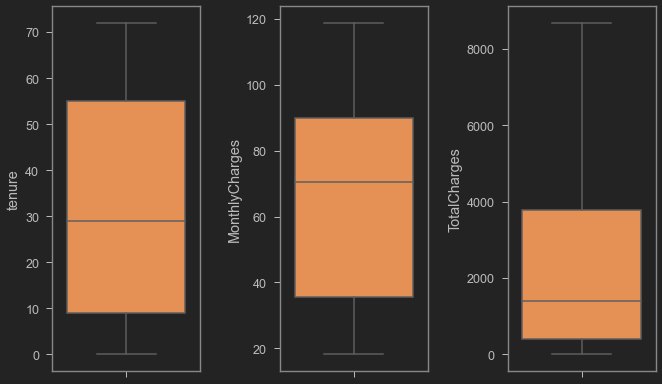

In [18]:
f, axes = plt.subplots(1, 3, figsize = (10,6.5))
f.tight_layout(pad=2.8)
sns.boxplot(y= df['tenure'], orient ='v', palette = 'YlOrRd', ax=axes[0])
sns.boxplot(y= df['MonthlyCharges'], orient ='v',ax=axes[1],palette = 'YlOrRd')
sns.boxplot(y= df['TotalCharges'], orient ='v',ax=axes[2],palette = 'YlOrRd')
plt.show()

- Dari data diatas terlihat bahwa tidak ada data outliers dari ketiga ***Numerical Columns***

In [14]:
# sns.boxplot(x= 'Churn',y= 'tenure', data = df, orient= 'v' , ax=axes[0])
# sns.boxplot(x= 'Churn',y= 'MonthlyCharges', data = df,  orient= 'v' , ax=axes[1])
# sns.boxplot(x= 'Churn',y= 'TotalCharges', data = df,  orient= 'v' , ax=axes[2])

<h5> Mendeteksi Duplikasi data

In [15]:
df[df.duplicated()] 
print(df.duplicated().value_counts())

False    7043
dtype: int64


- Data sudah bersih dan siap lanjut ke  

### Analysis Data
  
  - Churn Customers percentage distribution

In [16]:
cust_pct_churn = df['Churn'].value_counts(normalize=True) * 100 
cust_pct_churn

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

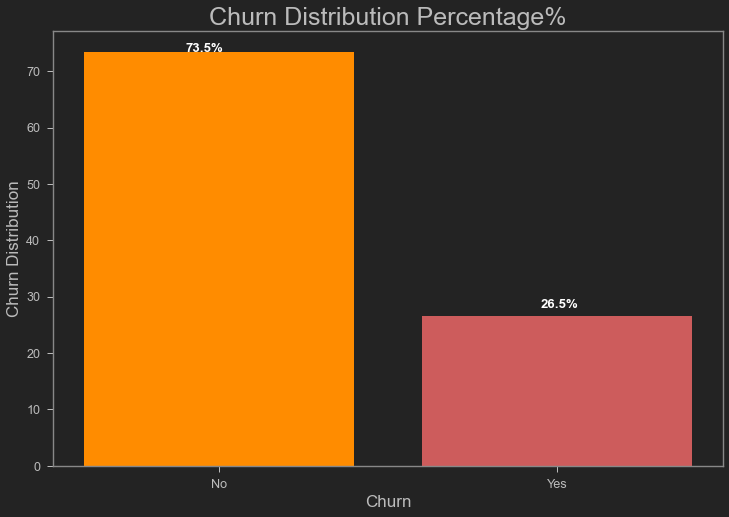

<Figure size 576x504 with 0 Axes>

In [54]:
xo = cust_pct_churn.index
yo = cust_pct_churn.values
plt.figure(figsize=(12,8))  
plt.bar(xo, yo,color=['darkorange','indianred']);
plt.xlabel('Churn',fontdict={'fontsize': 17})
plt.ylabel('Churn Distribution',fontdict={'fontsize': 17}) 
plt.title('Churn Distribution Percentage%', fontdict={'fontsize': 25})
plt.text(0.95, 28, '26.5%', color='white',fontweight='bold')
plt.text(-0.1, 73.5, '73.5%', color='white',fontweight='bold')
plt.show()
# plt.savefig('plot1.png')

#### Terlihat dari data bar chart ini bahwa, setidaknya ada 26.5% customer telco yang unsubscribe service mereka di bulan sebelumnya
- Sekarang Coba kita telusuri data nya lebih jauh
### Numerical Feature Correlation

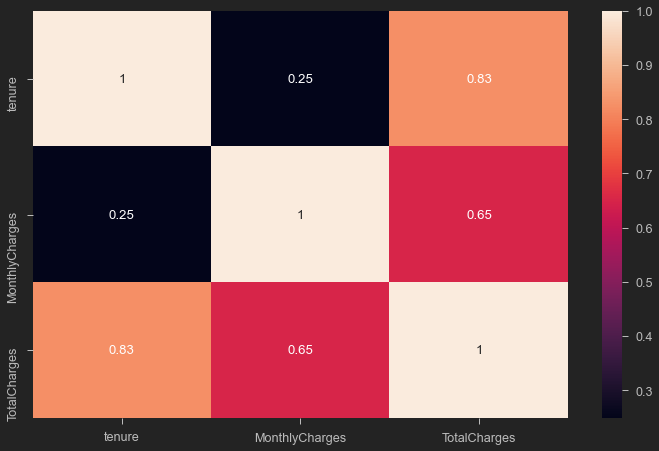

In [114]:
df1 = df.loc[:,'Partner':]
plt.figure(figsize=(12,7.5))
sns.heatmap(df1.corr(), annot=True);

# plt.savefig('plot2.png')

In [19]:
Churn_Yes_tenure = df[df['Churn'] =='Yes']
Churn_No_tenure = df[df['Churn'] =='No']

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000000,0.000000,0.000000,1.000000
tenure,7043.0,32.371149,24.559481,0.00,9.000000,29.000000,55.000000,72.000000
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500000,70.350000,89.850000,118.750000
TotalCharges,7043.0,2279.732178,2266.794434,0.00,398.549988,1394.550049,3786.599976,8684.799805


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:1181: UserWarning: The following kwargs were not used by contour: 'pallette'
  cset = contour_func(


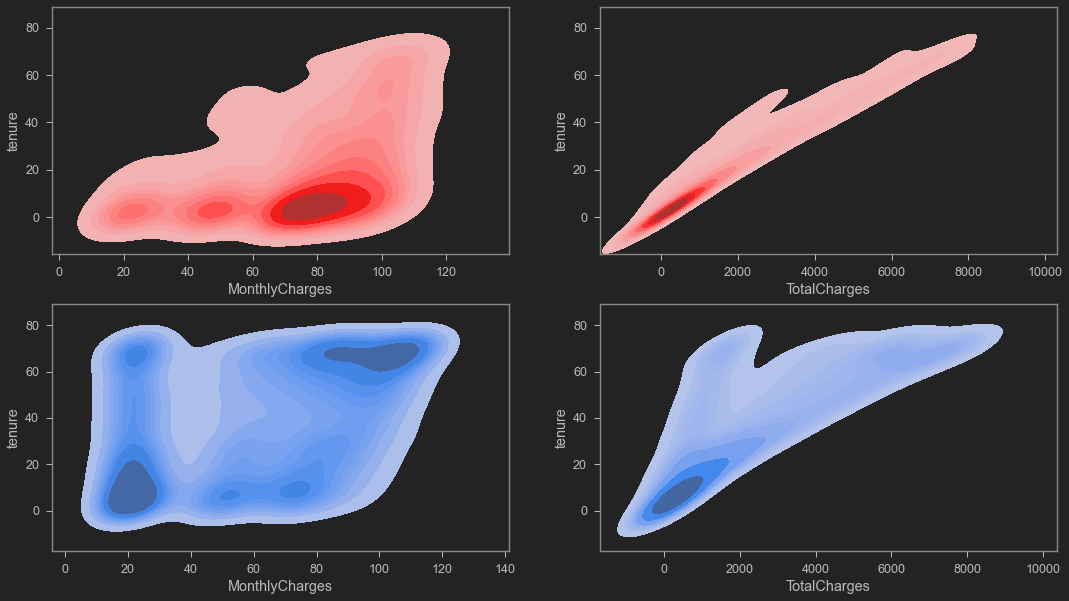

In [59]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize = (18,10))
f.tight_layout(pad=2.8)
sns.kdeplot(x="MonthlyCharges", y="tenure", data=Churn_Yes_tenure,ax=axes[0][0],color='red',fill=True, legend=True)
sns.kdeplot(x="TotalCharges", y="tenure", data=Churn_Yes_tenure,ax=axes[0][1],color='red',fill=True, legend=True)
sns.kdeplot(x="MonthlyCharges", y="tenure", data=Churn_No_tenure,ax=axes[1][0],pallette='YlOrRd',fill=True, legend=True)
sns.kdeplot(x="TotalCharges", y="tenure", data=Churn_No_tenure,ax=axes[1][1],palette='YlOrRd',fill=True, legend=True)
plt.show()

In [22]:
# f, axes = plt.subplots(2, 2, figsize = (18,10))
# f.tight_layout(pad=2.8)
# sns.scatterplot(x=Churn_Yes_tenure.MonthlyCharges,y=Churn_Yes_tenure.tenure, hue = Churn_Yes_tenure.Churn,s=50, ax=axes[0][0], palette='YlOrRd')
# sns.scatterplot(x=Churn_Yes_tenure.TotalCharges,y=Churn_Yes_tenure.tenure, hue = Churn_Yes_tenure.Churn,s=50, ax=axes[0][1], palette='YlOrRd')
# sns.scatterplot(x=Churn_No_tenure.MonthlyCharges,y=Churn_No_tenure.tenure, hue = Churn_No_tenure.Churn,s=50, ax=axes[1][0], palette='Set1')
# sns.scatterplot(x=Churn_No_tenure.TotalCharges,y=Churn_No_tenure.tenure, hue = Churn_No_tenure.Churn,s=50, ax=axes[1][1], palette='Set1')
# plt.show()

### Customer Churn yes Distribution

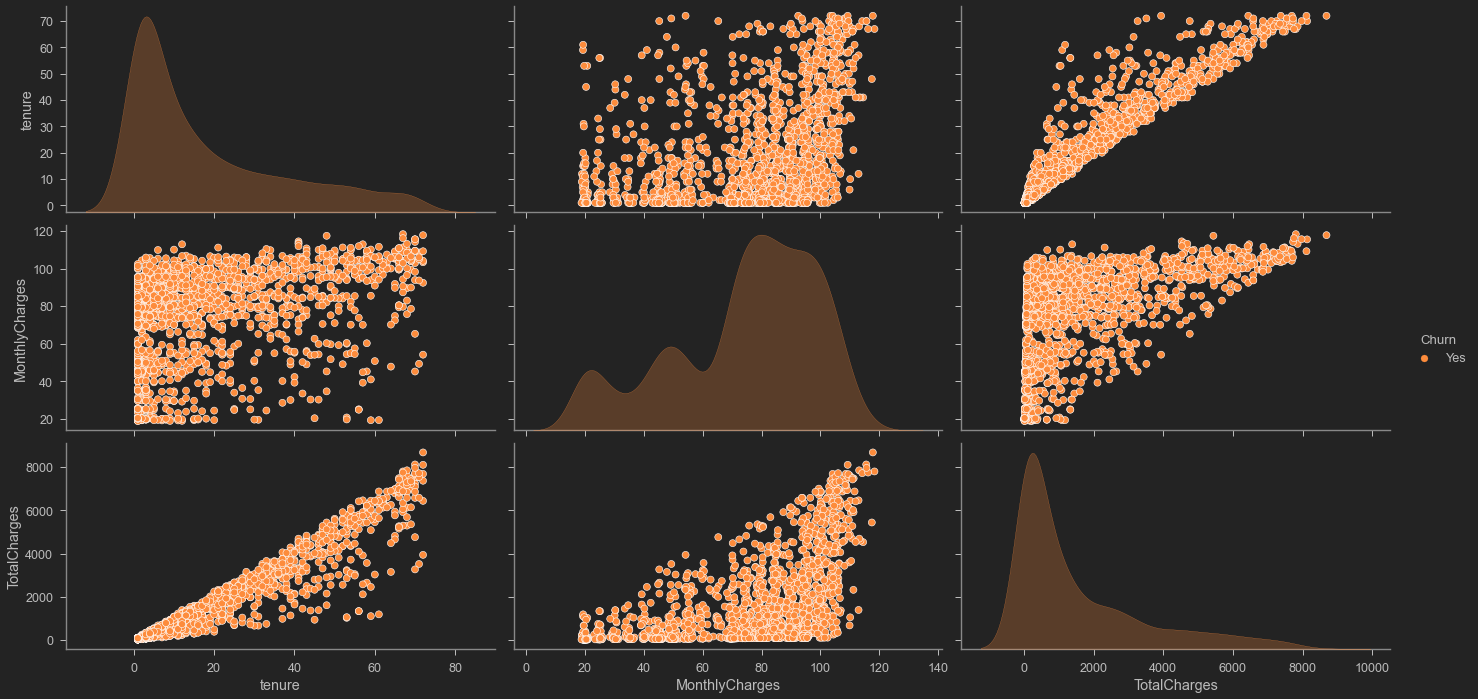

In [65]:
sns.pairplot(Churn_Yes_tenure.loc[:,'Partner':], palette='YlOrRd', hue = 'Churn',height=3.3, aspect= 2);

In [81]:
df.groupby('Churn')['tenure'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,37.569965,24.113777,0.0,15.0,38.0,61.0,72.0
Yes,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


In [25]:
df.groupby('Churn')['MonthlyCharges'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,61.265124,31.092648,18.25,25.10,64.425,88.4,118.75
Yes,1869.0,74.441332,24.666053,18.85,56.15,79.650,94.2,118.35


In [26]:
df.groupby('Churn')['TotalCharges'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,2549.912598,2329.952148,0.00,572.899979,1679.525024,4262.849976,8672.450195
Yes,1869.0,1531.794556,1890.823242,18.85,134.500000,703.549988,2331.300049,8684.799805


#### Jika dilihat dari datat diatas, ada beberapa fakta customer yang unsubscribe:
- Nilai korelasi positif dan cukup kuat dari customer churn yes dan no dari tenure dengan Total Charges, namun ini tidak memberikan informasi berarti karena tidak ada bedanya dari pola untuk customer yang churn dan yang tidak
- Dari Scatter Plot Customer Churn yes atau customer yang unsubscribe menunjukkan korelasi yang linear tapi lemah, namun terbentuk pola dimana semakin tinggi biaya monthly charges nya dan semakin sebentar jangka langganannya maka customer yang akan churn cenderung banyak.
- Dapat dilihat juga dari tabel diatas bahwa customer yang unsubsribe itu ***rata-rata berlangganan selama 18 bulan*** sebelum akhirnya unsubscribe.
  
  
### Melihat Data Dari Categorical Feature
  #### - Demographic Categorical Feature 

In [27]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.500000,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.750000,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.649994,Yes


In [94]:
print(pd.crosstab(index=df['gender'], columns=df['Churn']),'\n')
print((pd.crosstab(index=df['gender'], columns=df['Churn'],normalize='index')*100).round(2))
pd.crosstab(index=df['gender'], columns=df['Churn'])

Churn     No  Yes
gender           
Female  2549  939
Male    2625  930 

Churn      No    Yes
gender              
Female  73.08  26.92
Male    73.84  26.16


Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


In [72]:
print(pd.crosstab(index=df['Churn'], columns=df['SeniorCitizen']),'\n')
print((pd.crosstab(index=df['SeniorCitizen'], columns=df['Churn'],normalize='index')*100).round(2),"\n")

a = round(df.groupby('SeniorCitizen')['customerID'].count() / len(df) * 100,2)
print(f"Senior Citizen pct {a[1]}%")

SeniorCitizen     0    1
Churn                   
No             4508  666
Yes            1393  476 

Churn             No    Yes
SeniorCitizen              
0              76.39  23.61
1              58.32  41.68 

Senior Citizen pct 16.21%


In [73]:
print(pd.crosstab(index=df['Churn'], columns=df['Partner']),'\n')
print((pd.crosstab(index=df['Partner'], columns=df['Churn'],normalize='index')*100).round(2))

Partner    No   Yes
Churn              
No       2441  2733
Yes      1200   669 

Churn       No    Yes
Partner              
No       67.04  32.96
Yes      80.34  19.66


In [74]:
print(pd.crosstab(index=df['Churn'], columns=df['Dependents']),'\n')
print((pd.crosstab(index=df['Dependents'], columns=df['Churn'],normalize='index')*100).round(2))

Dependents    No   Yes
Churn                 
No          3390  1784
Yes         1543   326 

Churn          No    Yes
Dependents              
No          68.72  31.28
Yes         84.55  15.45


In [32]:
churn_rate = (pd.crosstab(index=df['Churn'], columns=df['SeniorCitizen'],normalize='columns')*100).round(2)
churn_rate
(pd.crosstab(index=[df['SeniorCitizen'],df['Partner']], columns=df['Churn'],normalize='index')*100).round(2)

Churn                     No    Yes
SeniorCitizen Partner              
0             No       69.99  30.01
              Yes      83.35  16.65
1             No       51.14  48.86
              Yes      65.45  34.55

In [33]:
churn_rate = (pd.crosstab(index=df['Churn'], columns=df['SeniorCitizen'],normalize='columns')*100).round(2)
churn_rate
(pd.crosstab(index=[df['SeniorCitizen'],df['Dependents']], columns=df['Churn'],normalize='index')*100).round(2)

Churn                        No    Yes
SeniorCitizen Dependents              
0             No          71.95  28.05
              Yes         84.94  15.06
1             No          56.80  43.20
              Yes         75.82  24.18

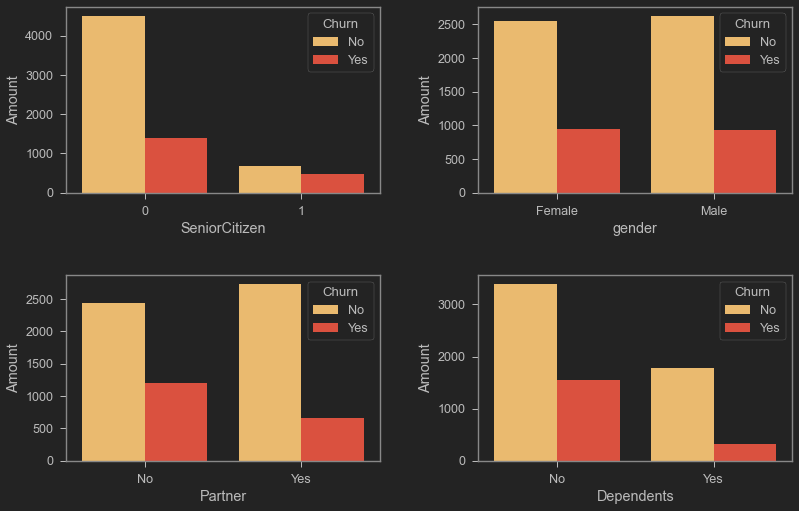

In [34]:
def barpelot(feature):
    camt = pd.crosstab(index=[df[feature],df['Churn']], columns='Amount')
    camt = camt.reset_index()
    sns.barplot(x=feature,y= 'Amount',hue='Churn', data=camt, palette = 'YlOrRd')

plt.figure(figsize=(12,8))    
plt.subplot(2,2,1)
barpelot('SeniorCitizen')

plt.subplot(2,2,2)
barpelot('gender')

plt.subplot(2,2,3)
barpelot('Partner')

plt.subplot(2,2,4)
barpelot('Dependents')

plt.tight_layout(pad=3.0)
plt.show()


> - Jenis Kelamin tidak berpengaruh pada churn.
> - Walau SeniorCitizens jumlahnya hanya 16% dari total Customer Telco, tapi churn rate mereka sampai 42% dibanding 23% yang non-senior customers.
> - Customer yang tidak memiliki pasangan cenderung memilih untuk unsubcribe dibanding yang punya pasangan
> - Customers tanpa tanggungan juga cenderung akan memilih unsubscribe.

In [35]:
# tes = pd.crosstab(index=[df['InternetService'],df['Churn']], columns='Amount')
# tes = tes.reset_index()
# tes

In [16]:
pd.crosstab(index=[df['InternetService'], df['PhoneService']], columns=df['Churn'])

Churn                           No   Yes
InternetService PhoneService            
DSL             No             512   170
                Yes           1450   289
Fiber optic     Yes           1799  1297
No              Yes           1413   113

In [15]:
pd.crosstab(index=[df['InternetService'], df['PhoneService']], columns=df['Churn'], normalize='index', ) * 100

Churn                                No        Yes
InternetService PhoneService                      
DSL             No            75.073314  24.926686
                Yes           83.381254  16.618746
Fiber optic     Yes           58.107235  41.892765
No              Yes           92.595020   7.404980

In [38]:
pd.crosstab(index=df['PhoneService'], columns=df['Churn'], normalize='index', ) * 100

Churn,No,Yes
PhoneService,,
No,75.073314,24.926686
Yes,73.290363,26.709637


In [39]:
pd.crosstab(index=df['InternetService'], columns=df['Churn'], normalize='index', ) * 100

Churn,No,Yes
InternetService,,
DSL,81.040892,18.959108
Fiber optic,58.107235,41.892765
No,92.595020,7.404980


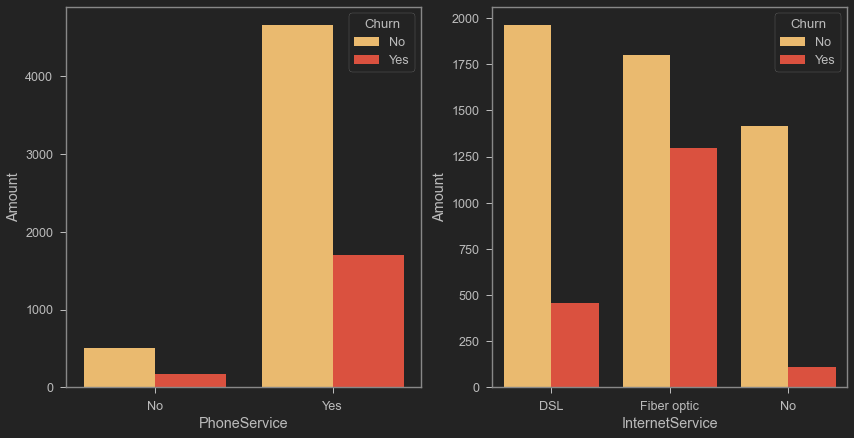

In [40]:
# sns.barplot(x='InternetService',y= 'Amount',hue='Churn' ,data=tes)
plt.figure(figsize=(14,7)) 
plt.subplot(1,2,1)
barpelot('PhoneService');
plt.subplot(1,2,2)
barpelot('InternetService');

> - Customer yang tidak mengambil paket internet kemungkinan untuk unsubcribe sangat kecil    
> - Sedangkan Customer yang mengambil paket internet dengan fiber Optic akan jauh lebih memungkinkan untuk unsubcribe

In [41]:
pd.crosstab(index=df['OnlineSecurity'], columns=df['Churn'], normalize='index', ) * 100

Churn,No,Yes
OnlineSecurity,,
No,58.233276,41.766724
No internet service,92.595020,7.404980
Yes,85.388806,14.611194


In [42]:
pd.crosstab(index=df['OnlineBackup'], columns=df['Churn'], normalize='index', ) * 100

Churn,No,Yes
OnlineBackup,,
No,60.071244,39.928756
No internet service,92.595020,7.404980
Yes,78.468506,21.531494


In [43]:
pd.crosstab(index=df['DeviceProtection'], columns=df['Churn'], normalize='index', ) * 100

Churn,No,Yes
DeviceProtection,,
No,60.872375,39.127625
No internet service,92.595020,7.404980
Yes,77.497936,22.502064


In [44]:
pd.crosstab(index=df['TechSupport'], columns=df['Churn'], normalize='index', ) * 100

Churn,No,Yes
TechSupport,,
No,58.364526,41.635474
No internet service,92.595020,7.404980
Yes,84.833659,15.166341


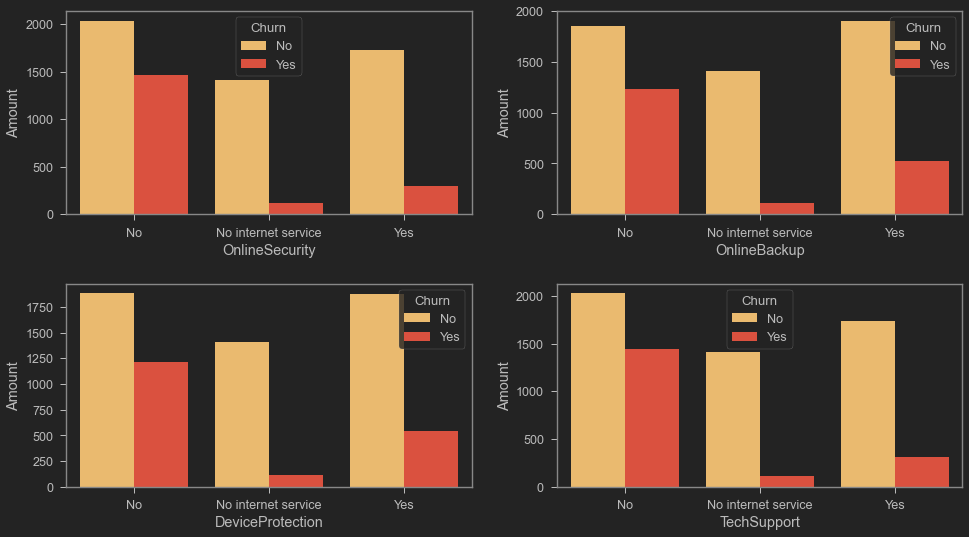

In [45]:
plt.figure(figsize=(14,8))    
plt.subplot(2,2,1)
barpelot('OnlineSecurity')

plt.subplot(2,2,2)
barpelot('OnlineBackup')

plt.subplot(2,2,3)
barpelot('DeviceProtection')

plt.subplot(2,2,4)
barpelot('TechSupport')


plt.tight_layout(pad=2.0)
plt.show()

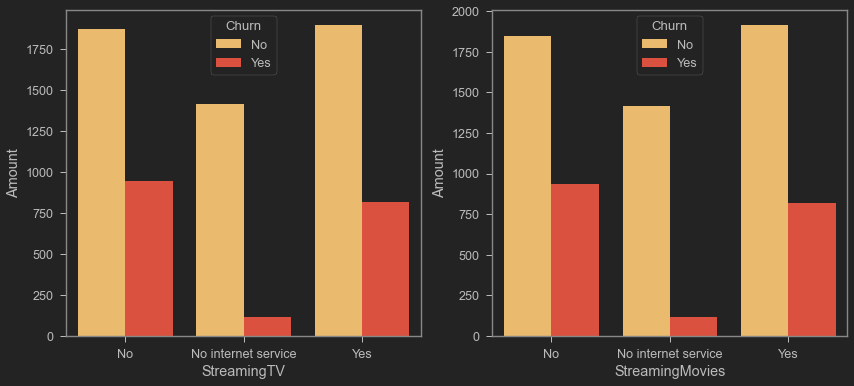

In [46]:
plt.figure(figsize=(14,6))    
plt.subplot(1,2,1)
barpelot('StreamingTV')

plt.subplot(1,2,2)
barpelot('StreamingMovies')

> - Customer yang tidak mempunyai fitur2 kemanan, Teknisi support dan Online backup cenderung akan memilih untuk unsubscribe
> - Sedangkan dari kategori streaming service tidak pengaruh terhadap customer churn

### Other Categorical Feature

In [47]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.500000,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.750000,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.649994,Yes


In [23]:
(pd.crosstab(index=df['Contract'], columns=df['Churn'],normalize='index', margins=True)*100).round(2)

Churn,No,Yes
Contract,,
Month-to-month,57.29,42.71
One year,88.73,11.27
Two year,97.17,2.83
All,73.46,26.54


In [20]:
(pd.crosstab(index=df['Contract'], columns=df['Churn'],normalize='columns', margins= True)*100).round(2)

Churn,No,Yes,All
Contract,,,
Month-to-month,42.91,88.55,55.02
One year,25.26,8.88,20.91
Two year,31.83,2.57,24.07


In [24]:
pd.crosstab(index=df['Contract'], columns=df['Churn'], margins=True)

Churn,No,Yes,All
Contract,,,
Month-to-month,2220,1655,3875
One year,1307,166,1473
Two year,1647,48,1695
All,5174,1869,7043


In [49]:
(pd.crosstab(index=df['PaperlessBilling'], columns=df['Churn'],normalize='index')*100).round(2)

Churn,No,Yes
PaperlessBilling,,
No,83.67,16.33
Yes,66.43,33.57


In [26]:
(pd.crosstab(index=[df['PaperlessBilling'],df['PaymentMethod']], columns=df['Churn'],normalize='index', margins=True)*100).round(2)

Churn                                          No    Yes
PaperlessBilling PaymentMethod                          
No               Bank transfer (automatic)  88.97  11.03
                 Credit card (automatic)    90.00  10.00
                 Electronic check           67.26  32.74
                 Mailed check               86.51  13.49
Yes              Bank transfer (automatic)  79.12  20.88
                 Credit card (automatic)    80.95  19.05
                 Electronic check           50.23  49.77
                 Mailed check               72.71  27.29
All                                         73.46  26.54

In [27]:
(pd.crosstab(index=[df['PaperlessBilling'],df['PaymentMethod']], columns=df['Churn'],normalize='columns', margins=True)*100).round(2)

Churn                                          No    Yes    All
PaperlessBilling PaymentMethod                                 
No               Bank transfer (automatic)  11.23   3.85   9.27
                 Credit card (automatic)    11.13   3.42   9.09
                 Electronic check            8.10  10.91   8.85
                 Mailed check               15.98   6.90  13.57
Yes              Bank transfer (automatic)  13.63   9.95  12.65
                 Credit card (automatic)    13.80   8.99  12.52
                 Electronic check           16.91  46.39  24.73
                 Mailed check                9.22   9.58   9.31

In [50]:
(pd.crosstab(index=df['PaymentMethod'], columns=df['Churn'],normalize='index')*100).round(2)

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),83.29,16.71
Credit card (automatic),84.76,15.24
Electronic check,54.71,45.29
Mailed check,80.89,19.11


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

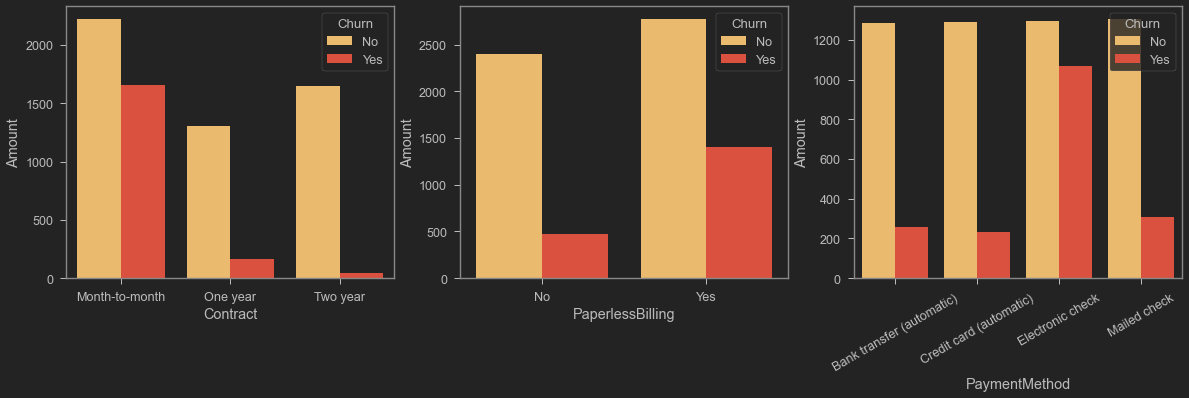

In [51]:
plt.figure(figsize=(20,5))
plt.tight_layout(pad=2.8)
plt.subplot(1,3,1)
barpelot('Contract')
plt.subplot(1,3,2)
barpelot('PaperlessBilling')
plt.subplot(1,3,3)
barpelot('PaymentMethod')
plt.xticks(rotation=30)

- Dari data diatas, customer yang base contract-nya month-to-month cenderung akan churn dibanding jenis contract lainnya
- Dilihat dari cara penagihannya, customer dengan payment method electronic check dan billing dengan paperless(electronic) juga cenderung churn dibanding dengan cara yang lain.

In [52]:
pd.crosstab(index=[df['InternetService'],df['Contract']], columns=df['Churn'])

Churn                            No   Yes
InternetService Contract                 
DSL             Month-to-month  829   394
                One year        517    53
                Two year        616    12
Fiber optic     Month-to-month  966  1162
                One year        435   104
                Two year        398    31
No              Month-to-month  425    99
                One year        355     9
                Two year        633     5

In [53]:
# pd.crosstab(index=[df['Partner'],df['Contract']], columns=df['Churn'])
(pd.crosstab(index=[df['InternetService'],df['Contract']], columns=df['Churn'],normalize='index',margins=True) * 100).round(2)

Churn                              No    Yes
InternetService Contract                    
DSL             Month-to-month  67.78  32.22
                One year        90.70   9.30
                Two year        98.09   1.91
Fiber optic     Month-to-month  45.39  54.61
                One year        80.71  19.29
                Two year        92.77   7.23
No              Month-to-month  81.11  18.89
                One year        97.53   2.47
                Two year        99.22   0.78
All                             73.46  26.54

- Jika categorical feature dikelompokkan seperti diatas, customer dengan ***Internet Service Fiber Optic dan contract month to month*** akan condong untuk churn/unsubscribe dari company services.
- Dari setiap sample demografi yang diambil dengan Internet Service Fiber Optic dan contract month to month churn rate nya melebihi 50% atau setengah dari customer tersebut memilih unsubsribe

In [53]:
df[(df['Churn']== 'Yes') & (df['MonthlyCharges'] > 55)].mean()

SeniorCitizen        0.286914
tenure              20.512246
MonthlyCharges      85.994402
TotalCharges      1886.172974
dtype: float64

In [52]:
df[(df['Churn']== 'No') & (df['MonthlyCharges'] > 55)].mean()

SeniorCitizen        0.180751
tenure              43.056673
MonthlyCharges      84.685379
TotalCharges      3782.872559
dtype: float64

In [60]:
(pd.crosstab(index=[df['SeniorCitizen'],df['PaperlessBilling'],df['PaymentMethod'],df['Contract']], columns=df['Churn'],normalize='columns',margins=True) * 100).round(2)

Churn                                                                      No  \
SeniorCitizen PaperlessBilling PaymentMethod             Contract               
0             No               Bank transfer (automatic) Month-to-month  2.53   
                                                         One year        2.73   
                                                         Two year        4.91   
                               Credit card (automatic)   Month-to-month  1.95   
                                                         One year        2.84   
                                                         Two year        5.32   
                               Electronic check          Month-to-month  4.31   
                                                         One year        1.72   
                                                         Two year        0.97   
                               Mailed check              Month-to-month  6.57   
                                                         One year        3.79   
                                                         Two year        5.18   
              Yes              Bank transfer (automatic) Month-to-month  3.69   
                                                         One year        2.92   
                                                         Two year        4.60   
                               Credit card (automatic)   Month-to-month  3.92   
                                                         One year        3.32   
                                                         Two year        4.50   
                               Electronic check          Month-to-month  8.19   
                                                         One year        2.78   
                                                         Two year        1.68   
                               Mailed check              Month-to-month  4.66   
                                                         One year        2.05   
                                                         Two year        1.99   
1             No               Bank transfer (automatic) Month-to-month  0.39   
                                                         One year        0.37   
                                                         Two year        0.31   
                               Credit card (automatic)   Month-to-month  0.29   
                                                         One year        0.27   
                                                         Two year        0.46   
                               Electronic check          Month-to-month  0.81   
                                                         One year        0.21   
                                                         Two year        0.08   
                               Mailed check              Month-to-month  0.21   
                                                         One year        0.15   
                                                         Two year        0.08   
              Yes              Bank transfer (automatic) Month-to-month  0.89   
                                                         One year        0.81   
                                                         Two year        0.72   
                               Credit card (automatic)   Month-to-month  0.89   
                                                         One year        0.46   
                                                         Two year        0.70   
                               Electronic check          Month-to-month  3.23   
                                                         One year        0.75   
                                                         Two year        0.27   
                               Mailed check              Month-to-month  0.37   
                                                         One year        0.08   
                               

## KESIMPULAN
> #### - Customer yang ambil Paket Internet dengan Fiber Optic, lebih besar kemungkinan untuk unsubscribe. 
> 
> #### - Senior Citizen Customer memiliki churn rate yang tinggi sekitar 42%. Hal ini juga terjadi jika customer tidak memiliki Partner atau Dependents yang churn rate nya lebih dari 30%
>
> #### - Customer dengan contract Month - to Month dan Tenure dibawah 18 bulan, cenderung akan unsubscribe. 
>
> #### - Customer dengan penagihan paperless cenderung lebih banyak yang unsubscribe
>
> #### - Jenis pembayaran Elektronik Check memiliki tingkat churn rate yang tinggi

## REKOMENDASI
> #### - Sebaiknya Pelayanan pada Fiber Optic lebih dimaksimalkan karena banyak yang berhenti berlangganan.
>  
> #### - Sebaiknya perlu memikirkan strategi apakah akan mengurangi target market ke demografi customer dengan churn rate yang tinggi atau engage mereka dengan memberikan promo atau diskon.
> 
> #### - Mengarahkan Customer untuk ambil Contract per Tahun atau lebih baik per Dua Tahun